# DAML 05 - Die Hard

Michal Grochmal <michal.grochmal@city.ac.uk>

Every time I watch a *Die Hard* movie I get the impression that there's almost no women acting.
In other words, I get the impression that everyone in that film is a bunch of blokes hitting each other.
Let's try to check this statistically: collect data about all five *Die Hard* movies and
plot the ratio of actors and actresses in the cast of each movie.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.5, 6.0)
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import time
import functools
import requests
from bs4 import BeautifulSoup
from collections import OrderedDict

In [2]:
movies = ['Die Hard', 'Die Hard 2',
          'Die Hard with a Vengeance', 'Live Free or Die Hard', 'A Good Day to Die Hard']
url_base = 'https://en.wikipedia.org'
urls = dict([(m, url_base + '/wiki/' + m.replace(' ', '_')) for m in movies])
urls

{'A Good Day to Die Hard': 'https://en.wikipedia.org/wiki/A_Good_Day_to_Die_Hard',
 'Die Hard': 'https://en.wikipedia.org/wiki/Die_Hard',
 'Die Hard 2': 'https://en.wikipedia.org/wiki/Die_Hard_2',
 'Die Hard with a Vengeance': 'https://en.wikipedia.org/wiki/Die_Hard_with_a_Vengeance',
 'Live Free or Die Hard': 'https://en.wikipedia.org/wiki/Live_Free_or_Die_Hard'}

In [3]:
def retrieve_cast(url):
    r = requests.get(url)
    print(r.status_code, url)
    time.sleep(3)
    soup = BeautifulSoup(r.text, 'lxml')
    cast = soup.find('span', id='Cast').parent.find_all_next('ul')[0].find_all('li')
    return dict([(li.find('a')['title'], li.find('a')['href']) for li in cast if li.find('a')])


movies_cast = dict([(m, retrieve_cast(urls[m])) for m in movies])
movies_cast

200 https://en.wikipedia.org/wiki/Die_Hard
200 https://en.wikipedia.org/wiki/Die_Hard_2
200 https://en.wikipedia.org/wiki/Die_Hard_with_a_Vengeance
200 https://en.wikipedia.org/wiki/Live_Free_or_Die_Hard
200 https://en.wikipedia.org/wiki/A_Good_Day_to_Die_Hard


{'A Good Day to Die Hard': {'Amaury Nolasco': '/wiki/Amaury_Nolasco',
  'Bruce Willis': '/wiki/Bruce_Willis',
  'Cole Hauser': '/wiki/Cole_Hauser',
  'Ganxsta Zolee': '/wiki/Ganxsta_Zolee',
  'Jai Courtney': '/wiki/Jai_Courtney',
  'Mary Elizabeth Winstead': '/wiki/Mary_Elizabeth_Winstead',
  'Roman Luknár': '/wiki/Roman_Lukn%C3%A1r',
  'Sebastian Koch': '/wiki/Sebastian_Koch',
  'Sergei Kolesnikov (actor)': '/wiki/Sergei_Kolesnikov_(actor)',
  'Yuliya Snigir': '/wiki/Yuliya_Snigir'},
 'Die Hard': {'Alan Rickman': '/wiki/Alan_Rickman',
  'Alexander Godunov': '/wiki/Alexander_Godunov',
  'Bonnie Bedelia': '/wiki/Bonnie_Bedelia',
  'Bruce Willis': '/wiki/Bruce_Willis',
  'Clarence Gilyard': '/wiki/Clarence_Gilyard',
  "De'voreaux White": '/wiki/De%27voreaux_White',
  'Hart Bochner': '/wiki/Hart_Bochner',
  'James Shigeta': '/wiki/James_Shigeta',
  'Paul Gleason': '/wiki/Paul_Gleason',
  'Reginald VelJohnson': '/wiki/Reginald_VelJohnson',
  'William Atherton': '/wiki/William_Atherton'},
 

In [4]:
def retrieve_actor(url):
    full_url = url_base + url
    r = requests.get(full_url)
    print(r.status_code, full_url)
    time.sleep(3)
    soup = BeautifulSoup(r.text, 'lxml')
    data = {}
    bday = soup.find(class_='bday')
    if bday:
        data['bday'] = bday.string
    vcard = soup.find('table', class_='vcard')
    if vcard:
        ths = vcard.find_all('th', scope='row')
        th_rows = [th.string.replace('\xa0', ' ') for th in ths]
        th_data = [th.find_next('td').text.replace('\xa0', ' ') for th in ths]
        data.update(dict(zip(th_rows, th_data)))
    return data


cast = {}
for m in movies_cast:
    for act in movies_cast[m]:
        data = retrieve_actor(movies_cast[m][act])
        data[m] = 1
        if data and act in cast:
            cast[act].update(data)
        elif data:
            cast[act] = data

200 https://en.wikipedia.org/wiki/Bruce_Willis
200 https://en.wikipedia.org/wiki/Alan_Rickman
200 https://en.wikipedia.org/wiki/Alexander_Godunov
200 https://en.wikipedia.org/wiki/Bonnie_Bedelia
200 https://en.wikipedia.org/wiki/Reginald_VelJohnson
200 https://en.wikipedia.org/wiki/Paul_Gleason
200 https://en.wikipedia.org/wiki/De%27voreaux_White
200 https://en.wikipedia.org/wiki/William_Atherton
200 https://en.wikipedia.org/wiki/Clarence_Gilyard
200 https://en.wikipedia.org/wiki/Hart_Bochner
200 https://en.wikipedia.org/wiki/James_Shigeta
200 https://en.wikipedia.org/wiki/Bruce_Willis
200 https://en.wikipedia.org/wiki/Bonnie_Bedelia
200 https://en.wikipedia.org/wiki/Art_Evans
200 https://en.wikipedia.org/wiki/Dennis_Franz
200 https://en.wikipedia.org/wiki/William_Sadler_(actor)
200 https://en.wikipedia.org/wiki/Franco_Nero
200 https://en.wikipedia.org/wiki/Reginald_VelJohnson
200 https://en.wikipedia.org/wiki/William_Atherton
200 https://en.wikipedia.org/wiki/Fred_Thompson
200 https:/

In [5]:
keys = [list(cast[i]) for i in cast]
flat_keys = set(functools.reduce(lambda x, y: x + y, keys))
sorted(flat_keys)

['A Good Day to Die Hard',
 'Alma mater',
 'Associated acts',
 'Billed from',
 'Billed height',
 'Billed weight',
 'Birth name',
 'Born',
 'Cause of death',
 'Children',
 'Debut',
 'Die Hard',
 'Die Hard 2',
 'Die Hard with a Vengeance',
 'Died',
 'Education',
 'Genres',
 'Home town',
 'Instruments',
 'Known for',
 'Labels',
 'Live Free or Die Hard',
 'Medium',
 'Nationality',
 'Notable work',
 'Occupation',
 'Occupation(s)',
 'Other names',
 'Parent(s)',
 'Partner(s)',
 'Political party',
 'Preceded by',
 'Relatives',
 'Residence',
 'Retired',
 'Ring name(s)',
 'Spouse(s)',
 'Subject(s)',
 'Succeeded by',
 'Trained by',
 'Website',
 'Years active',
 'bday']

In [6]:
df_name = []
df_columns = {}
for k in flat_keys:
    df_columns[k] = []
for act in cast:
    df_name.append(act)
    for k in df_columns:
        if k in cast[act]:
            df_columns[k].append(cast[act][k])
        else:
            df_columns[k].append(np.nan)
df = pd.DataFrame(df_columns, index=df_name)
df.head()

,A Good Day to Die Hard,Alma mater,Associated acts,Billed from,Billed height,Billed weight,Birth name,Born,Cause of death,Children,...,Residence,Retired,Ring name(s),Spouse(s),Subject(s),Succeeded by,Trained by,Website,Years active,bday
Bruce Willis,1.0,Montclair State University,NaN,NaN,NaN,NaN,NaN,"Walter Bruce Willis\n(1955-03-19) March 19, 19...",NaN,5,...,"Los Angeles, California, U.S.",NaN,NaN,Demi Moore (m. 1987; div. 2000)\nEmma Heming (...,NaN,NaN,NaN,NaN,1979–present,1955-03-19
Alan Rickman,NaN,Royal Academy of Dramatic Art,NaN,NaN,NaN,NaN,NaN,Alan Sidney Patrick Rickman\n(1946-02-21)21 Fe...,Pancreatic cancer,NaN,...,NaN,NaN,NaN,Rima Horton\n(m. 2012),NaN,NaN,NaN,NaN,1974–2016,1946-02-21
Alexander Godunov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alexander Borisevich Godunov\n(1949-11-28)Nove...,Complications from hepatitis due to chronic al...,NaN,...,NaN,NaN,NaN,Lyudmila Vlasova\n(m. 1971; div. 1982),NaN,NaN,NaN,NaN,NaN,1949-11-28
Bonnie Bedelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bonnie Bedelia Culkin\n(1948-03-25) March 25, ...",NaN,2,...,NaN,NaN,NaN,Ken Luber (m. 1969; div. 1980)\nMichael MacRae...,NaN,NaN,NaN,NaN,1957–present,1948-03-25
Reginald VelJohnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Reginald Vel Johnson, Jr.\n(1952-08-16) August...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979–present,1952-08-16


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Bruce Willis to Ganxsta Zolee
Data columns (total 43 columns):
A Good Day to Die Hard       10 non-null float64
Alma mater                   13 non-null object
Associated acts              1 non-null object
Billed from                  2 non-null object
Billed height                2 non-null object
Billed weight                2 non-null object
Birth name                   3 non-null object
Born                         62 non-null object
Cause of death               7 non-null object
Children                     19 non-null object
Debut                        2 non-null object
Die Hard                     11 non-null float64
Die Hard 2                   23 non-null float64
Die Hard with a Vengeance    17 non-null float64
Died                         9 non-null object
Education                    3 non-null object
Genres                       2 non-null object
Home town                    1 non-null object
Instruments            

In [8]:
features = ['Die Hard', 'Die Hard 2', 'Die Hard with a Vengeance',
            'Live Free or Die Hard', 'A Good Day to Die Hard',
            'Alma mater', 'Born', 'Children', 'Nationality',
            'Occupation', 'Occupation(s)', 'Partner(s)', 'Spouse(s)',
            'Years active', 'bday', ]
df = df[features].copy()  # throw old `df` away
df.head()

,Die Hard,Die Hard 2,Die Hard with a Vengeance,Live Free or Die Hard,A Good Day to Die Hard,Alma mater,Born,Children,Nationality,Occupation,Occupation(s),Partner(s),Spouse(s),Years active,bday
Bruce Willis,1.0,1.0,1.0,1.0,1.0,Montclair State University,"Walter Bruce Willis\n(1955-03-19) March 19, 19...",5,American,"Actor, Producer with Cheyenne Enterprises, Singer",NaN,NaN,Demi Moore (m. 1987; div. 2000)\nEmma Heming (...,1979–present,1955-03-19
Alan Rickman,1.0,NaN,NaN,NaN,NaN,Royal Academy of Dramatic Art,Alan Sidney Patrick Rickman\n(1946-02-21)21 Fe...,NaN,NaN,"Actor, director",NaN,NaN,Rima Horton\n(m. 2012),1974–2016,1946-02-21
Alexander Godunov,1.0,NaN,NaN,NaN,NaN,NaN,Alexander Borisevich Godunov\n(1949-11-28)Nove...,NaN,\n\n\nSoviet (1949–1982; def.)[1]\nUnited Stat...,\n\n\nBallet dancer\nactor\nballet coach\n\n\n,NaN,Jacqueline Bisset (1981–1988),Lyudmila Vlasova\n(m. 1971; div. 1982),NaN,1949-11-28
Bonnie Bedelia,1.0,1.0,NaN,NaN,NaN,NaN,"Bonnie Bedelia Culkin\n(1948-03-25) March 25, ...",2,NaN,Actress,NaN,NaN,Ken Luber (m. 1969; div. 1980)\nMichael MacRae...,1957–present,1948-03-25
Reginald VelJohnson,1.0,1.0,NaN,NaN,NaN,NaN,"Reginald Vel Johnson, Jr.\n(1952-08-16) August...",NaN,American,"Actor, comedian",NaN,NaN,NaN,1979–present,1952-08-16


In [9]:
actor = (df['Occupation'].str.contains('[Aa]ctor')
         | df['Occupation(s)'].str.contains('[Aa]ctor')
         | df.index.str.contains('[Aa]ctor'))
actor = actor.astype(np.int)
actor

Bruce Willis                 1
Alan Rickman                 1
Alexander Godunov            1
Bonnie Bedelia               0
Reginald VelJohnson          1
Paul Gleason                 1
De'voreaux White             1
William Atherton             1
Clarence Gilyard             1
Hart Bochner                 1
James Shigeta                1
Art Evans                    1
Dennis Franz                 1
William Sadler (actor)       1
Franco Nero                  1
Fred Thompson                0
John Amos                    1
Tom Bower (actor)            1
Sheila McCarthy              0
Donald Patrick Harvey        1
Colm Meaney                  1
Robert Costanzo              1
Vondie Curtis-Hall           1
John Costelloe (actor)       1
Tony Ganios                  1
Peter Nelson (actor)         1
John Leguizamo               1
Tom Verica                   1
Robert Patrick               1
Mark Boone Junior            1
                            ..
Nick Wyman                   1
Sam Phil

In [10]:
df['actor'] = actor
df.head()

,Die Hard,Die Hard 2,Die Hard with a Vengeance,Live Free or Die Hard,A Good Day to Die Hard,Alma mater,Born,Children,Nationality,Occupation,Occupation(s),Partner(s),Spouse(s),Years active,bday,actor
Bruce Willis,1.0,1.0,1.0,1.0,1.0,Montclair State University,"Walter Bruce Willis\n(1955-03-19) March 19, 19...",5,American,"Actor, Producer with Cheyenne Enterprises, Singer",NaN,NaN,Demi Moore (m. 1987; div. 2000)\nEmma Heming (...,1979–present,1955-03-19,1
Alan Rickman,1.0,NaN,NaN,NaN,NaN,Royal Academy of Dramatic Art,Alan Sidney Patrick Rickman\n(1946-02-21)21 Fe...,NaN,NaN,"Actor, director",NaN,NaN,Rima Horton\n(m. 2012),1974–2016,1946-02-21,1
Alexander Godunov,1.0,NaN,NaN,NaN,NaN,NaN,Alexander Borisevich Godunov\n(1949-11-28)Nove...,NaN,\n\n\nSoviet (1949–1982; def.)[1]\nUnited Stat...,\n\n\nBallet dancer\nactor\nballet coach\n\n\n,NaN,Jacqueline Bisset (1981–1988),Lyudmila Vlasova\n(m. 1971; div. 1982),NaN,1949-11-28,1
Bonnie Bedelia,1.0,1.0,NaN,NaN,NaN,NaN,"Bonnie Bedelia Culkin\n(1948-03-25) March 25, ...",2,NaN,Actress,NaN,NaN,Ken Luber (m. 1969; div. 1980)\nMichael MacRae...,1957–present,1948-03-25,0
Reginald VelJohnson,1.0,1.0,NaN,NaN,NaN,NaN,"Reginald Vel Johnson, Jr.\n(1952-08-16) August...",NaN,American,"Actor, comedian",NaN,NaN,NaN,1979–present,1952-08-16,1


In [11]:
actress = (df['Occupation'].str.contains('[Aa]ctress')
           | df['Occupation(s)'].str.contains('[Aa]ctress')
           | df.index.str.contains('[Aa]ctress'))
actress = actress.astype(np.int)
df['actress'] = actress
df.head()

,Die Hard,Die Hard 2,Die Hard with a Vengeance,Live Free or Die Hard,A Good Day to Die Hard,Alma mater,Born,Children,Nationality,Occupation,Occupation(s),Partner(s),Spouse(s),Years active,bday,actor,actress
Bruce Willis,1.0,1.0,1.0,1.0,1.0,Montclair State University,"Walter Bruce Willis\n(1955-03-19) March 19, 19...",5,American,"Actor, Producer with Cheyenne Enterprises, Singer",NaN,NaN,Demi Moore (m. 1987; div. 2000)\nEmma Heming (...,1979–present,1955-03-19,1,0
Alan Rickman,1.0,NaN,NaN,NaN,NaN,Royal Academy of Dramatic Art,Alan Sidney Patrick Rickman\n(1946-02-21)21 Fe...,NaN,NaN,"Actor, director",NaN,NaN,Rima Horton\n(m. 2012),1974–2016,1946-02-21,1,0
Alexander Godunov,1.0,NaN,NaN,NaN,NaN,NaN,Alexander Borisevich Godunov\n(1949-11-28)Nove...,NaN,\n\n\nSoviet (1949–1982; def.)[1]\nUnited Stat...,\n\n\nBallet dancer\nactor\nballet coach\n\n\n,NaN,Jacqueline Bisset (1981–1988),Lyudmila Vlasova\n(m. 1971; div. 1982),NaN,1949-11-28,1,0
Bonnie Bedelia,1.0,1.0,NaN,NaN,NaN,NaN,"Bonnie Bedelia Culkin\n(1948-03-25) March 25, ...",2,NaN,Actress,NaN,NaN,Ken Luber (m. 1969; div. 1980)\nMichael MacRae...,1957–present,1948-03-25,0,1
Reginald VelJohnson,1.0,1.0,NaN,NaN,NaN,NaN,"Reginald Vel Johnson, Jr.\n(1952-08-16) August...",NaN,American,"Actor, comedian",NaN,NaN,NaN,1979–present,1952-08-16,1,0


In [12]:
no_gender = df[(df['actor'] == 0) & (df['actress'] == 0)]
names = no_gender.index.values
no_gender

,Die Hard,Die Hard 2,Die Hard with a Vengeance,Live Free or Die Hard,A Good Day to Die Hard,Alma mater,Born,Children,Nationality,Occupation,Occupation(s),Partner(s),Spouse(s),Years active,bday,actor,actress
Fred Thompson,NaN,1.0,NaN,NaN,NaN,Memphis State University (B.A.)\nVanderbilt Un...,Freddie Dalton Thompson\n(1942-08-19)August 19...,5,American,NaN,NaN,NaN,Sarah Knestrick (m. 1959; div. 1985)\nJeri Keh...,NaN,1942-08-19,0,0
Sam Phillips (musician),NaN,NaN,1.0,NaN,NaN,NaN,"(1962-01-28) January 28, 1962 (age 56)\nGlenda...",NaN,NaN,NaN,Singer-songwriter,NaN,NaN,1980–present,1962-01-28,0,0
Mischa Hausserman,NaN,NaN,1.0,NaN,NaN,NaN,"(1941-10-31) October 31, 1941 (age 76)\n Vienn...",NaN,NaN,NaN,NaN,NaN,NaN,1965–present,1941-10-31,0,0
Richard E. Council,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
Tony Halme,NaN,NaN,1.0,NaN,NaN,NaN,"(1963-01-06)January 6, 1963[1][2]\nHelsinki, F...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-01-06,0,0
Damien Demento,NaN,NaN,1.0,NaN,NaN,NaN,"(1958-06-25) June 25, 1958 (age 59)[1]\nLong I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958-06-25,0,0
Yorgo Constantine,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
Ganxsta Zolee,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [13]:
df.drop(names, inplace=True)
df.shape

(58, 17)

In [14]:
df[df['Born'].isnull() & df['bday'].isnull()]

,Die Hard,Die Hard 2,Die Hard with a Vengeance,Live Free or Die Hard,A Good Day to Die Hard,Alma mater,Born,Children,Nationality,Occupation,Occupation(s),Partner(s),Spouse(s),Years active,bday,actor,actress
Tom Bower (actor),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [15]:
df.drop('Tom Bower (actor)', inplace=True)
df.shape

(57, 17)

In [16]:
no_bday = df[df['bday'].isnull()]
no_bday

,Die Hard,Die Hard 2,Die Hard with a Vengeance,Live Free or Die Hard,A Good Day to Die Hard,Alma mater,Born,Children,Nationality,Occupation,Occupation(s),Partner(s),Spouse(s),Years active,bday,actor,actress
Robert Sedgwick (actor),NaN,NaN,1.0,NaN,NaN,NaN,United States,NaN,NaN,Actor,NaN,NaN,NaN,1984-present,NaN,1,0
Christina Chang,NaN,NaN,NaN,1.0,NaN,University of Washington,"Taipei, Taiwan",NaN,NaN,Actress/presenter,NaN,NaN,NaN,1998–present,NaN,0,1


In [17]:
byear = no_bday['Years active'].str.extract('(\d+)', expand=False).astype(np.int) - 20
byear

Robert Sedgwick (actor)    1964
Christina Chang            1978
Name: Years active, dtype: int64

In [18]:
bday = byear.astype(np.str) + '-01-01'
df.loc[df['bday'].isnull(), 'bday'] = bday
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, Bruce Willis to Roman Luknár
Data columns (total 17 columns):
Die Hard                     11 non-null float64
Die Hard 2                   21 non-null float64
Die Hard with a Vengeance    12 non-null float64
Live Free or Die Hard        12 non-null float64
A Good Day to Die Hard       9 non-null float64
Alma mater                   12 non-null object
Born                         57 non-null object
Children                     18 non-null object
Nationality                  13 non-null object
Occupation                   56 non-null object
Occupation(s)                0 non-null object
Partner(s)                   3 non-null object
Spouse(s)                    28 non-null object
Years active                 50 non-null object
bday                         57 non-null object
actor                        57 non-null int64
actress                      57 non-null int64
dtypes: float64(5), int64(2), object(10)
memory usage: 8.0+ KB


In [19]:
features = ['Die Hard', 'Die Hard 2', 'Die Hard with a Vengeance',
            'Live Free or Die Hard', 'A Good Day to Die Hard',
            'actor', 'actress', 'bday', ]
df = df[features].copy()
df = df.fillna(0)
df['bday'] = pd.to_datetime(df['bday'])
df.head()

,Die Hard,Die Hard 2,Die Hard with a Vengeance,Live Free or Die Hard,A Good Day to Die Hard,actor,actress,bday
Bruce Willis,1.0,1.0,1.0,1.0,1.0,1,0,1955-03-19
Alan Rickman,1.0,0.0,0.0,0.0,0.0,1,0,1946-02-21
Alexander Godunov,1.0,0.0,0.0,0.0,0.0,1,0,1949-11-28
Bonnie Bedelia,1.0,1.0,0.0,0.0,0.0,0,1,1948-03-25
Reginald VelJohnson,1.0,1.0,0.0,0.0,0.0,1,0,1952-08-16


In [20]:
df['age'] = (pd.to_datetime('today') - df['bday']).dt.days // 365.25
df

,Die Hard,Die Hard 2,Die Hard with a Vengeance,Live Free or Die Hard,A Good Day to Die Hard,actor,actress,bday,age
Bruce Willis,1.0,1.0,1.0,1.0,1.0,1,0,1955-03-19,62.0
Alan Rickman,1.0,0.0,0.0,0.0,0.0,1,0,1946-02-21,72.0
Alexander Godunov,1.0,0.0,0.0,0.0,0.0,1,0,1949-11-28,68.0
Bonnie Bedelia,1.0,1.0,0.0,0.0,0.0,0,1,1948-03-25,69.0
Reginald VelJohnson,1.0,1.0,0.0,0.0,0.0,1,0,1952-08-16,65.0
Paul Gleason,1.0,0.0,0.0,0.0,0.0,1,0,1939-05-04,78.0
De'voreaux White,1.0,0.0,0.0,0.0,0.0,1,0,1965-08-06,52.0
William Atherton,1.0,1.0,0.0,0.0,0.0,1,0,1947-07-30,70.0
Clarence Gilyard,1.0,0.0,0.0,0.0,0.0,1,0,1955-12-24,62.0
Hart Bochner,1.0,0.0,0.0,0.0,0.0,1,0,1956-10-03,61.0


In [21]:
dh = OrderedDict({'Total': df})
movies = ['Die Hard', 'Die Hard 2',
          'Die Hard with a Vengeance', 'Live Free or Die Hard', 'A Good Day to Die Hard']
for m in movies:
    dh[m] = df[df[m] == 1]
dh.keys()

odict_keys(['Total', 'Die Hard', 'Die Hard 2', 'Die Hard with a Vengeance', 'Live Free or Die Hard', 'A Good Day to Die Hard'])

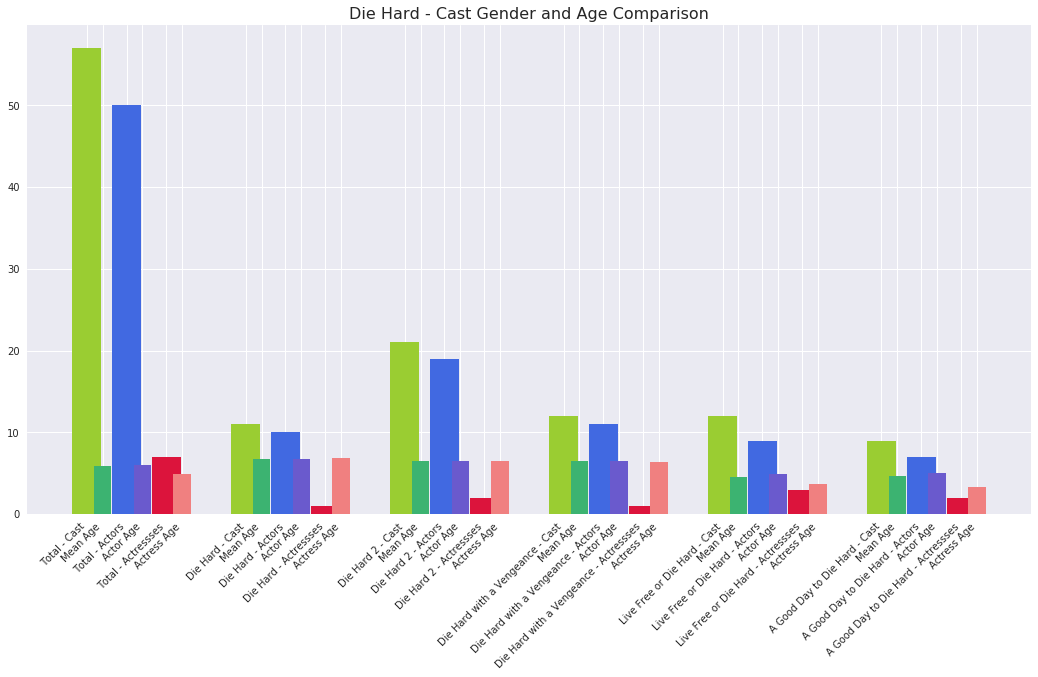

In [22]:
fig, ax = plt.subplots(figsize=(18, 9))
positions = np.array([])
bar_height = []
bar_width = []
labels = []
colors = []
base_position = np.array([1, 1.10, 1.25, 1.35, 1.50, 1.60])
next_position = 0
for m, data in dh.items():
    actor = data[data['actor'] == 1]
    actress = data[data['actress'] == 1]
    positions = np.append(positions, base_position + next_position)
    bar_height += [len(data), data.age.mean() / 10,
                   data.actor.sum(), actor.age.mean() / 10,
                   data.actress.sum(), actress.age.mean() / 10]
    bar_width += [0.18, 0.11, 0.18, 0.11, 0.18, 0.11]
    labels += [m + ' - Cast', 'Mean Age', m + ' - Actors', 'Actor Age', m + ' - Actressses', 'Actress Age']
    colors += ['yellowgreen', 'mediumseagreen', 'royalblue', 'slateblue', 'crimson', 'lightcoral']
    next_position += 1
rects = ax.bar(positions, bar_height, width=bar_width, tick_label=labels, color=colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Die Hard - Cast Gender and Age Comparison', fontsize=16);